## EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../data/processed/all_data_cleaned.csv")

In [3]:
df.head()

,id,event,source,text,lang,lang_conf,class_label,cleaned_text
0,18582,disaster_events,drd-figureeight-multimedia,Approximately 100km long firebreaks have been ...,en,1.0,infrastructure_and_utilities_damage,approximately 100km long firebreaks have been ...
1,592616302138658817,2015_nepal_earthquake,crisisnlp-volunteers,God bless you... https://t.co/AnEy1ydkkz,en,NaN,not_humanitarian,god bless you
2,503643491143282688,2014_california_earthquake,crisisnlp-cf,"RT @perreaux: Cracked wine casks, damaged hist...",en,NaN,infrastructure_and_utilities_damage,rt cracked wine casks damaged historical build...
3,323833109051228160,2013_boston_bombings-ontopic,crisislext6,I'm really just excited for new undies and pin...,en,1.0,not_humanitarian,im really just excited for new undies and pink...
4,508333923886067712,2014_pakistan_floods,crisisnlp-cf,"Rescue effort expands in India, Pakistan as fl...",en,1.0,injured_or_dead_people,rescue effort expands in india pakistan as flo...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212766 entries, 0 to 212765
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            212766 non-null  int64  
 1   event         212766 non-null  object 
 2   source        212766 non-null  object 
 3   text          212766 non-null  object 
 4   lang          212766 non-null  object 
 5   lang_conf     134934 non-null  float64
 6   class_label   212766 non-null  object 
 7   cleaned_text  212766 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.0+ MB


From here, we see that most of data items have no empty values.

Length Distribution

count    212766.000000
mean         14.252808
std           9.709167
min           1.000000
25%           9.000000
50%          13.000000
75%          18.000000
max        1072.000000
Name: text_length, dtype: float64


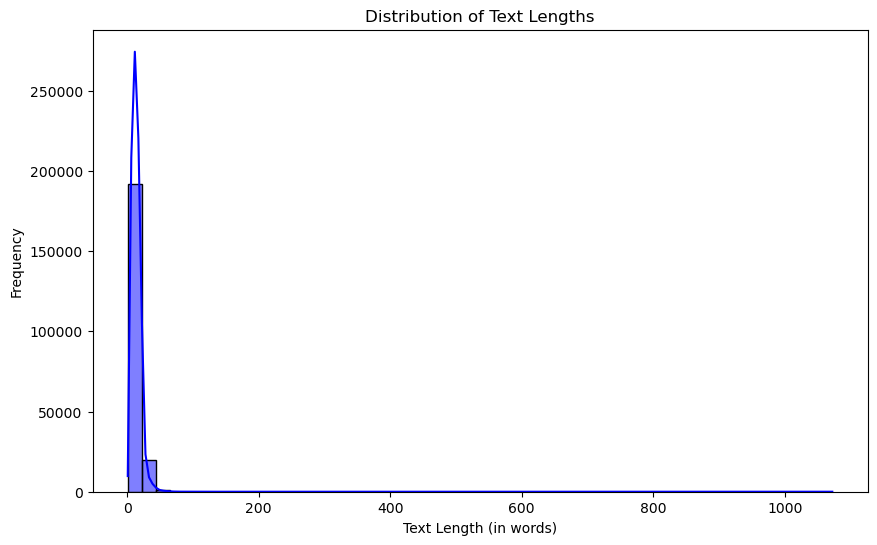

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# text length
df['text_length'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))
print(df['text_length'].describe())

# length barplot
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color="blue")
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (in words)")
plt.ylabel("Frequency")
plt.show()


Here we found some text lengths equal to 1, thus we need to check some samples.
And most texts have length between 0 and 50, need to make some samples and check if useful.

Now I want to check the text with really short length, they could be big noises and affect our future work. Here I set lenght equals 5 as a standard, and check how much are they in dataset.

In [6]:
# how many short text are there
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# filter short text (len <= 5)
short_texts = df[df['text_length'] <= 5]

# count ratio of short text
short_text_count = len(short_texts)
total_count = len(df)
short_text_ratio = short_text_count / total_count * 100

print(f"short text count: {short_text_count}")
print(f"ratio of short text: {short_text_ratio:.2f}%")


short text count: 14088
ratio of short text: 6.62%


In [7]:
# random sampling to see short text
sample_short_texts = short_texts['cleaned_text'].sample(20, random_state=42)
print("random sample of short text:")
for i, text in enumerate(sample_short_texts, 1):
    print(f"{i}. {text}")


random sample of short text:
1. viceryllepizzacouple prayforvisayas thatsmytomboy g2bitssocomplicated
2. just got an ac unit
3. pray can change everything prayforthephilippines
4. hot very hot
5. long island nyc fujix xe1
6. hey are you okay prayforthephilippines
7. prayforboston i cant even believe
8. en weekend
9. omg consolidated edison of ny
10. give arkansas some prayerstornadoviloniaarkansasweather
11. monitoing rubyph via twitter
12. nepalearthquake death toll reaches 2000
13. here u go dude
14. unlike my dumbass
15. attention everyone i lost power
16. not really superstitious just ridiculous
17. now my parents are leaving
18. japan landslide toll to double
19. so cute baby blonde dd55c
20. something about a pretty yella


short text in different labels:
not_humanitarian                       5796
not_informative                        5134
informative                            2192
sympathy_and_support                    421
response_efforts                        110
donation_and_volunteering               104
infrastructure_and_utilities_damage     102
requests_or_needs                        78
caution_and_advice                       61
affected_individual                      42
injured_or_dead_people                   24
missing_and_found_people                 20
displaced_and_evacuations                 4
Name: class_label, dtype: int64


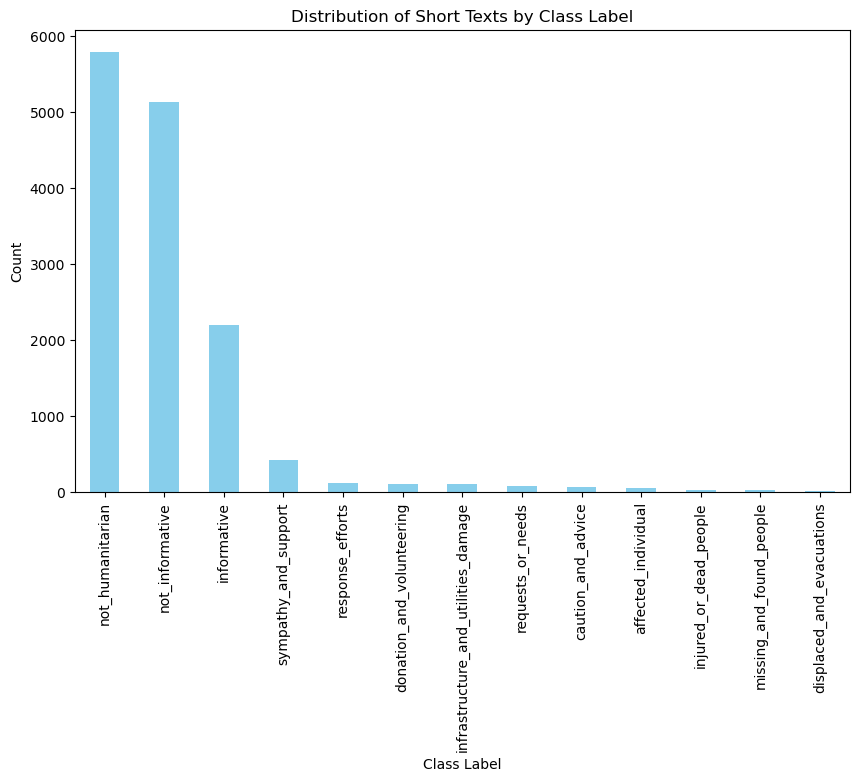

In [8]:
short_text_class_dist = short_texts['class_label'].value_counts()

print("short text in different labels:")
print(short_text_class_dist)

# visi
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
short_text_class_dist.plot(kind='bar', color='skyblue')
plt.title("Distribution of Short Texts by Class Label")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


key word in short text:
                  Keyword  Count
15                 rubyph    822
9                   nepal    644
14                     rt    461
6                      im    355
1                     god    319
16                   safe    288
10        nepalearthquake    281
0              earthquake    278
8                    love    256
3                 hagupit    256
11            philippines    247
2                    good    236
13  prayforthephilippines    220
19                typhoon    219
12                   pray    197
18                tornado    189
4                    help    188
17                   stay    187
7                    just    185
5               hurricane    185


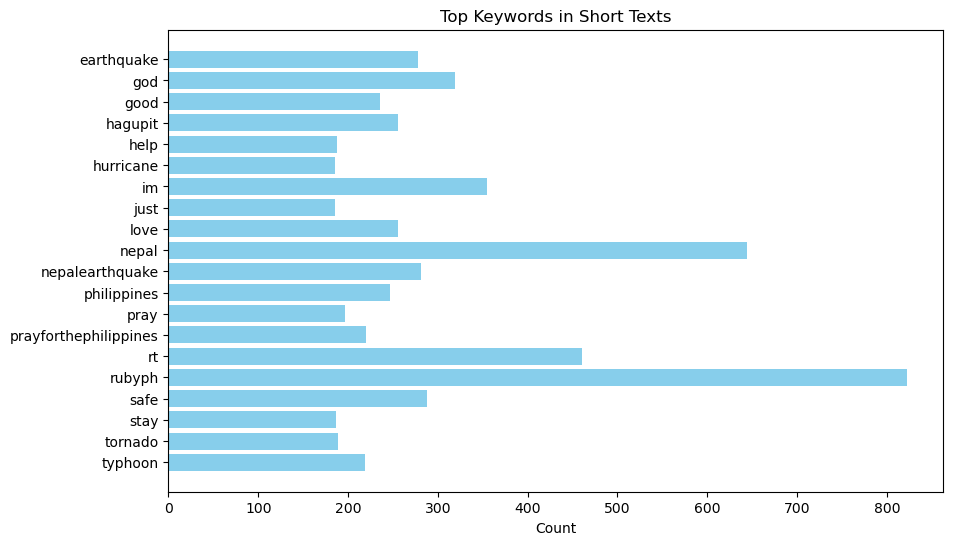

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# key word extraction
vectorizer = CountVectorizer(stop_words='english', max_features=20)
short_text_keywords = vectorizer.fit_transform(short_texts['cleaned_text'])

# count keyword
keywords = vectorizer.get_feature_names_out()
word_counts = short_text_keywords.toarray().sum(axis=0)

keyword_df = pd.DataFrame({'Keyword': keywords, 'Count': word_counts})
print("key word in short text:")
print(keyword_df.sort_values(by='Count', ascending=False))

# vis
plt.figure(figsize=(10, 6))
plt.barh(keyword_df['Keyword'], keyword_df['Count'], color='skyblue')
plt.title("Top Keywords in Short Texts")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()


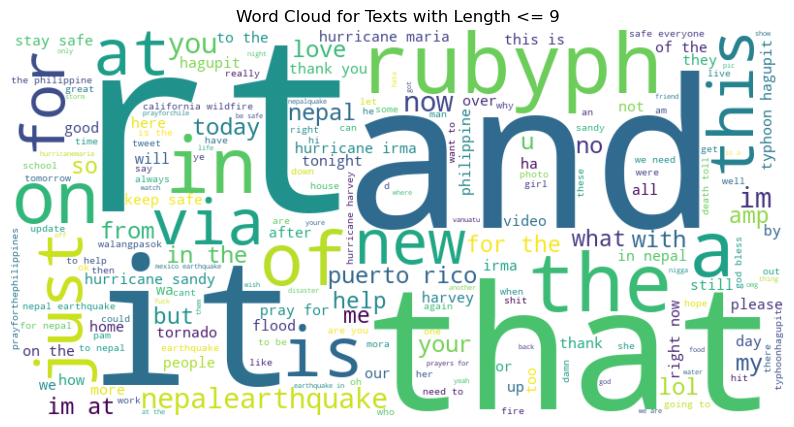

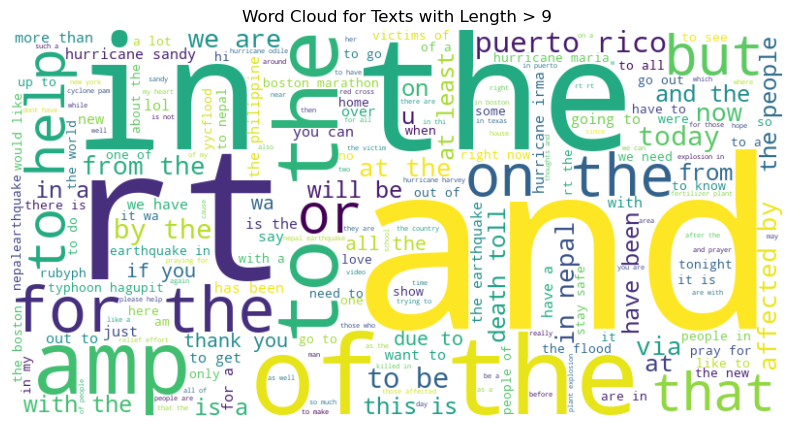

In [10]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# split into long and short text
long_texts = df[df['text_length'] > 9]['cleaned_text']
short_texts = df[df['text_length'] <= 9]['cleaned_text']

long_text_str = " ".join(long_texts)
short_text_str = " ".join(short_texts)

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords="english").generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()

# word cloud
generate_wordcloud(short_text_str, "Word Cloud for Texts with Length <= 9")
generate_wordcloud(long_text_str, "Word Cloud for Texts with Length > 9")


Obviously, too much stopwords affect the vision, we need to remove them and redo it.

In [11]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/a123/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def stopwords_remove(text):
    """stopwords remocal"""
    if not isinstance(text, str):
        return ""
    words = text.split()
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return " ".join(words)

# text if that works
sample_text = "This is a sample sentence, with a URL: https://example.com #example @user."
print("Cleaned Text:", stopwords_remove(sample_text))


Cleaned Text: This sample sentence, URL: https://example.com #example @user.


In [13]:
df['cleaned_text'] = df['cleaned_text'].apply(stopwords_remove)

long_texts = df[df['text_length'] > 9]['cleaned_text']
short_texts = df[df['text_length'] <= 3]['cleaned_text']

long_text_str = " ".join(long_texts)
short_text_str = " ".join(short_texts)

Now, re-check word cloud after stopwords removal.

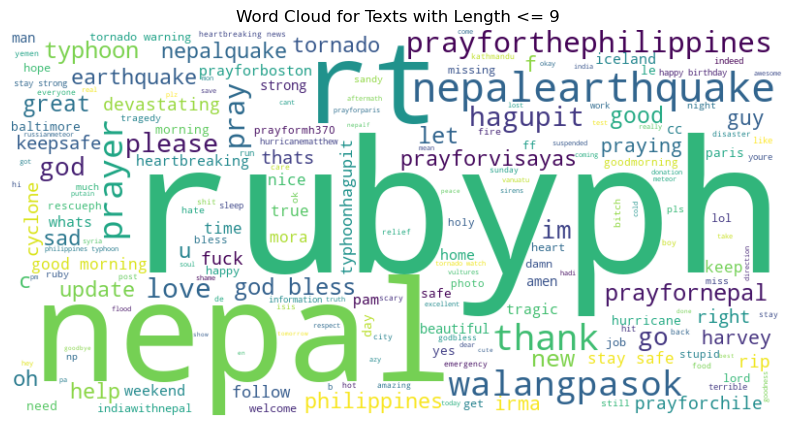

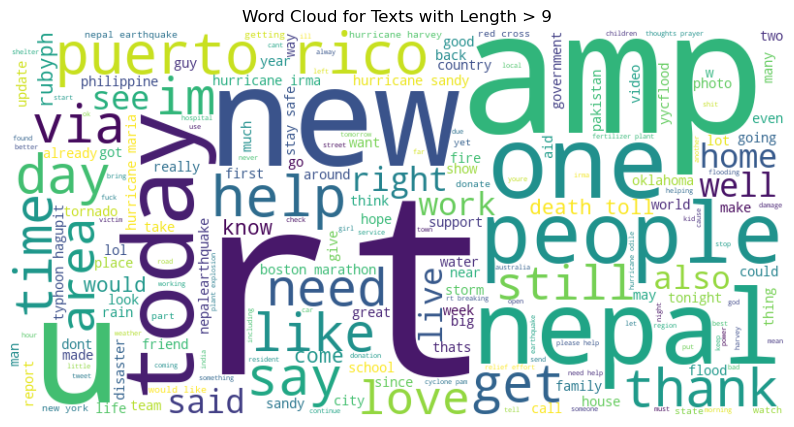

In [14]:
generate_wordcloud(short_text_str, "Word Cloud for Texts with Length <= 9")
generate_wordcloud(long_text_str, "Word Cloud for Texts with Length > 9")

- Now we found most frequent word in long text are "rt", which is "retweet", we can see some useful information that we would like to see (peoplenepal, death, e.g).
- We can see some key words like "rubyph", which is "ruby PH", hurricane "Ruby". And "Nepal", even in texts with length 3, thus we prefer not remove those short text.

Class Labels Distribution

Class Distribution:
informative                            75118
not_humanitarian                       51584
not_informative                        50193
donation_and_volunteering               7388
requests_or_needs                       6901
sympathy_and_support                    5104
infrastructure_and_utilities_damage     5050
affected_individual                     3510
caution_and_advice                      2990
injured_or_dead_people                  2773
response_efforts                        1114
missing_and_found_people                 531
displaced_and_evacuations                510
Name: class_label, dtype: int64


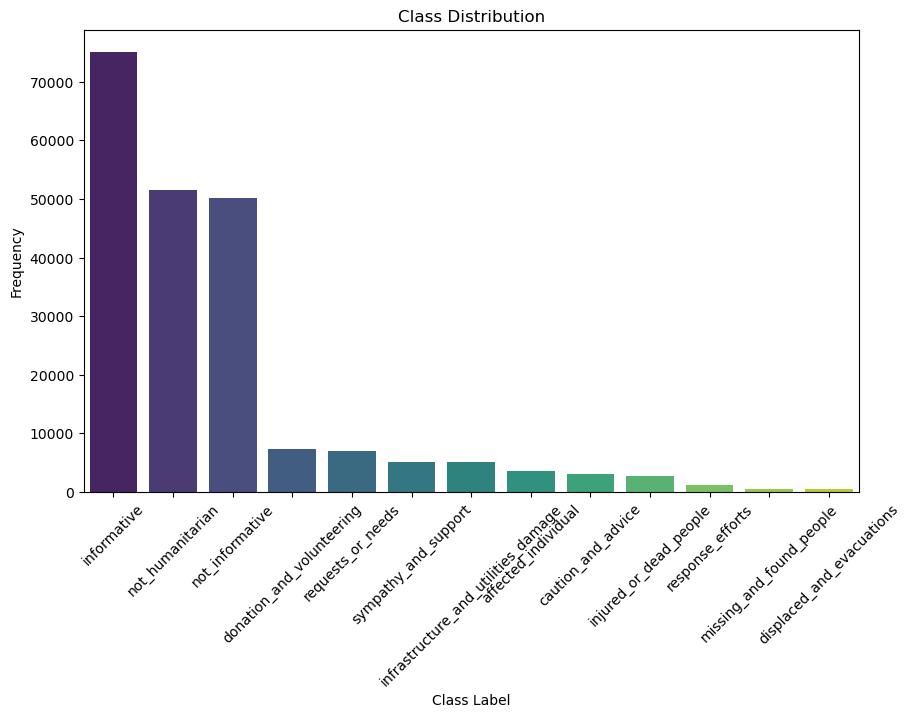

In [15]:
# classes count
class_counts = df['class_label'].value_counts()

# show classes
print("Class Distribution:")
print(class_counts)

# barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


Right here we found "informative" kind of texts have the largest frequency, "not_humanitatian" and "not_informative" are 2nd and 3rd. The number gap between these three labels are way much larger than the rest of texts with different labels.

Now, check if text length varied with different labels. Just make sure if text length changed with labels.

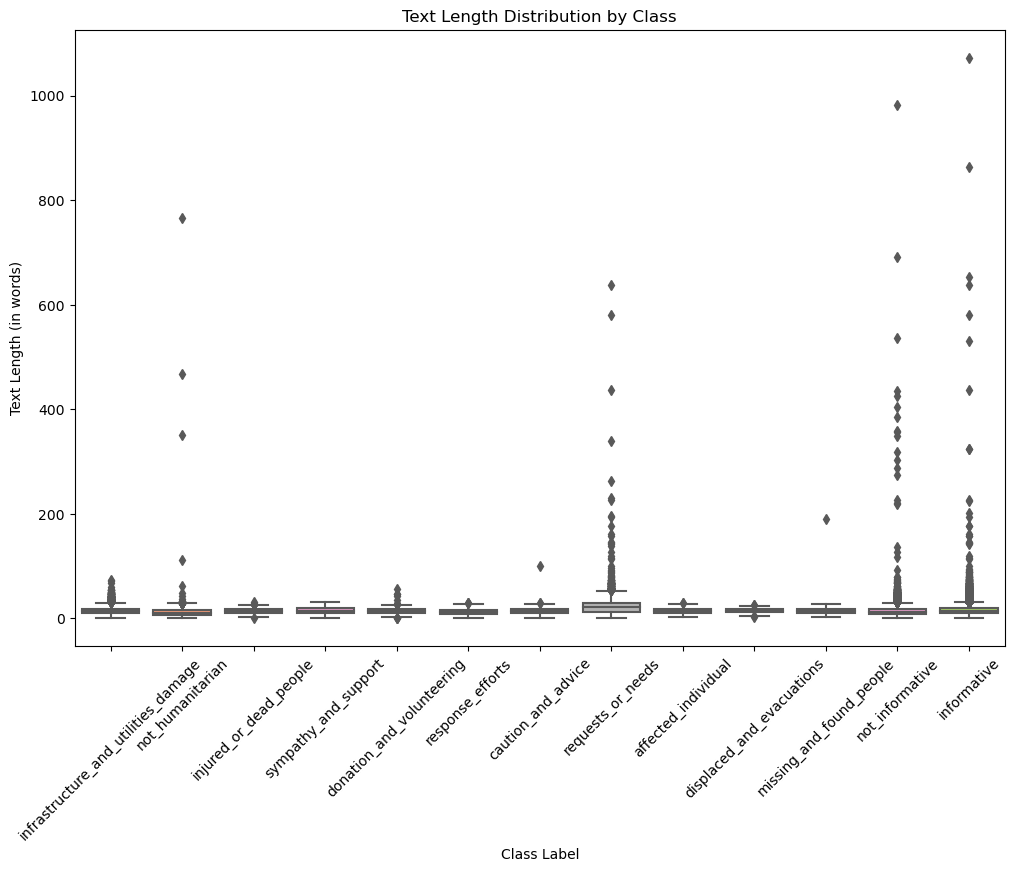

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='class_label', y='text_length', data=df, palette="Set2")
plt.title("Text Length Distribution by Class")
plt.xlabel("Class Label")
plt.ylabel("Text Length (in words)")
plt.xticks(rotation=45)
plt.show()


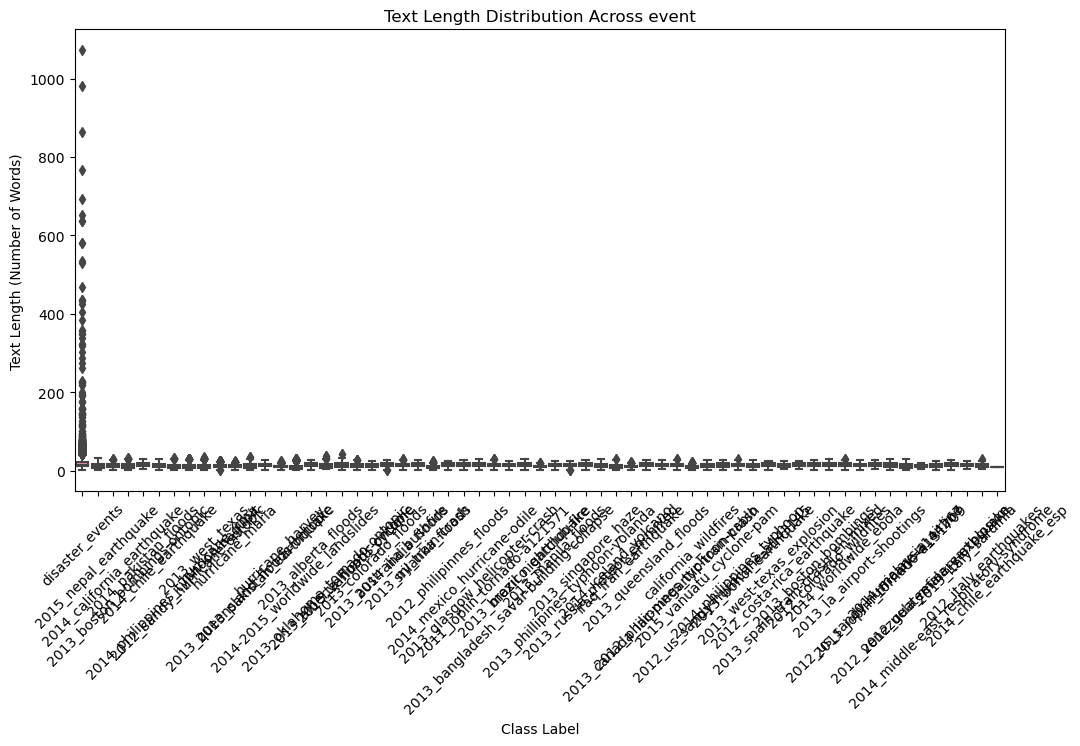

In [17]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='event', y='text_length', data=df)
plt.title("Text Length Distribution Across event")
plt.xlabel("Class Label")
plt.ylabel("Text Length (Number of Words)")
plt.xticks(rotation=45)
plt.show()


Event Distribution:
disaster_events                      41583
2015_nepal_earthquake                18493
2013_oklahoma_tornado-ontopic        12015
2014_philippines_typhoon-hagupit     11652
2013_alberta_floods-ontopic          11505
                                     ...  
2012_italy_earthquakes                 181
2014_malaysia_airline                  175
2013_italy_sardinia                    104
2012_venezuela_refinery-explosion      102
2014_chile_earthquake_esp                1
Name: event, Length: 61, dtype: int64


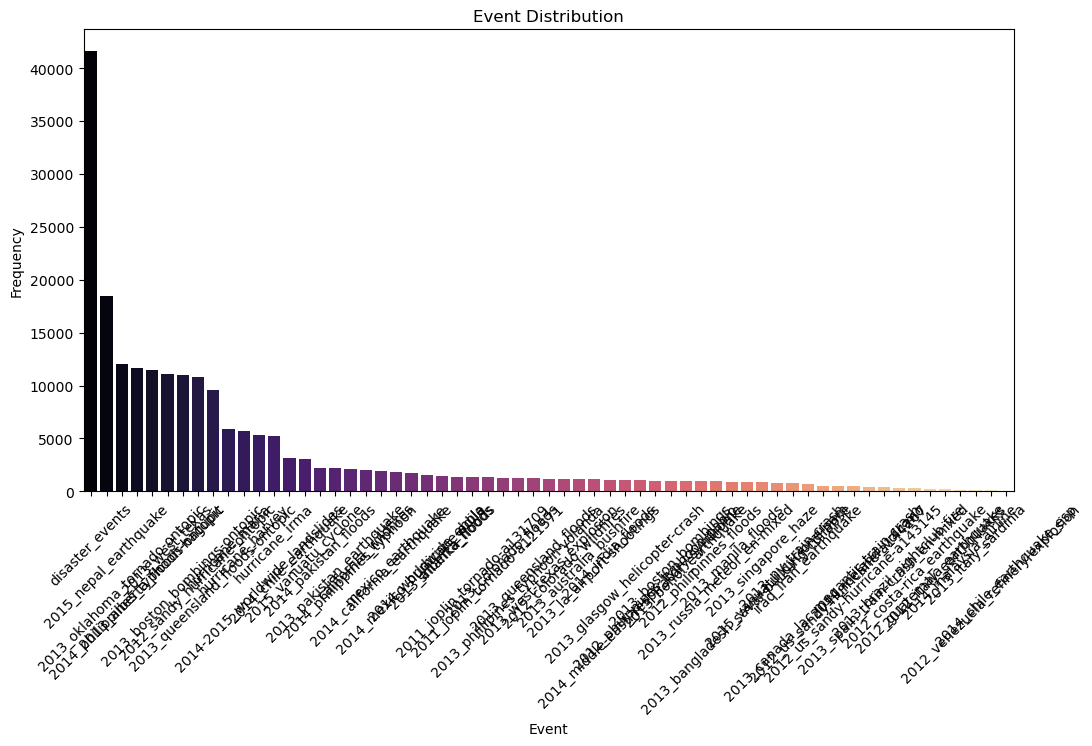

In [18]:
event_counts = df['event'].value_counts()
print("Event Distribution:")
print(event_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=event_counts.index, y=event_counts.values, palette="magma")
plt.title("Event Distribution")
plt.xlabel("Event")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


Disaster events are the most commonly happened stuff.

In [19]:
import pandas as pd
# value counts for events group by class_label
event_class_counts = df.groupby(['event', 'class_label']).size().reset_index(name='count')

print(event_class_counts.sort_values(by='count', ascending=False).head(10))


                                event        class_label  count
368                   disaster_events        informative  16918
373                   disaster_events    not_informative  12114
374                   disaster_events  requests_or_needs   6750
332             2015_nepal_earthquake   not_humanitarian   5789
317  2014_philippines_typhoon-hagupit   not_humanitarian   5256
175     2013_oklahoma_tornado-ontopic   not_humanitarian   4988
237                   2013_west_texas   not_humanitarian   4624
333             2015_nepal_earthquake    not_informative   4616
79        2013_alberta_floods-ontopic   not_humanitarian   4562
204    2013_queensland_floods-ontopic   not_humanitarian   4390


In [20]:
pivot_table = pd.pivot_table(df, 
                             values='id',  # count numbers by 'id'
                             index='event', # row
                             columns='class_label',  # col
                             aggfunc='count', 
                             fill_value=0)  # fill 0


In [21]:
pivot_table

class_label,affected_individual,caution_and_advice,displaced_and_evacuations,donation_and_volunteering,informative,infrastructure_and_utilities_damage,injured_or_dead_people,missing_and_found_people,not_humanitarian,not_informative,requests_or_needs,response_efforts,sympathy_and_support
event,,,,,,,,,,,,,
2011_joplin_tornado-a121571,0,410,0,189,606,0,125,43,0,0,0,0,0
2011_joplin_tornado-a131709,0,0,0,0,1299,0,0,0,43,35,0,0,0
2012_colorado_wildfires,132,43,0,74,676,64,0,0,10,9,0,0,157
2012_costa-rica_earthquake,16,65,0,0,165,11,0,0,20,17,0,0,23
2012_guatemala_earthquake,62,9,0,3,123,2,0,0,2,2,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
hurricane_irma,90,0,0,703,2509,365,62,5,834,657,0,0,0
hurricane_maria,81,0,0,885,2011,251,33,9,1475,1159,0,0,0
iraq_iran_earthquake,29,0,0,76,321,27,93,0,82,63,0,0,0


In [22]:

max_labels_per_event = pivot_table.idxmax(axis=1)  
max_counts_per_event = pivot_table.max(axis=1)    

event_top_label = pd.DataFrame({
    'Top_Class_Label': max_labels_per_event,
    'Count': max_counts_per_event
})

print("most labels in each event with numbers:")
print(event_top_label)


most labels in each event with numbers:
                              Top_Class_Label  Count
event                                               
2011_joplin_tornado-a121571       informative    606
2011_joplin_tornado-a131709       informative   1299
2012_colorado_wildfires           informative    676
2012_costa-rica_earthquake        informative    165
2012_guatemala_earthquake         informative    123
...                                       ...    ...
hurricane_irma                    informative   2509
hurricane_maria                   informative   2011
iraq_iran_earthquake              informative    321
mexico_earthquake                 informative    773
srilanka_floods              not_humanitarian    539

[61 rows x 2 columns]


Keywords analysis in multiple events and labels.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_keywords(texts, n=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=n)
    word_matrix = vectorizer.fit_transform(texts)
    words = vectorizer.get_feature_names_out()
    counts = word_matrix.sum(axis=0).A1
    return pd.DataFrame({'Keyword': words, 'Count': counts}).sort_values(by='Count', ascending=False)

# go through each class to find keyword sorted list
for label in df['class_label'].unique():
    print(f"Top Keywords for Class Label: {label}")
    label_texts = df[df['class_label'] == label]['cleaned_text']
    keywords_df = get_top_keywords(label_texts, n=10)
    print(keywords_df)
    print("-" * 30)


Top Keywords for Class Label: infrastructure_and_utilities_damage
      Keyword  Count
9          rt   1414
1      damage    721
6   hurricane    603
4  earthquake    550
7        irma    341
8       power    326
2     damaged    274
0  california    268
3   destroyed    259
5       homes    253
------------------------------
Top Keywords for Class Label: not_humanitarian
  Keyword  Count
3      im   3271
6   nepal   3038
8      rt   2525
9  rubyph   2517
4    like   2399
0     amp   2066
1    dont   1810
7  people   1576
5    love   1545
2    good   1453
------------------------------
Top Keywords for Class Label: injured_or_dead_people
      Keyword  Count
8          rt    830
2  earthquake    802
0        dead    603
9        toll    543
6       nepal    532
1       death    524
5      killed    468
7      people    424
4       india    405
3      floods    317
------------------------------
Top Keywords for Class Label: sympathy_and_support
      Keyword  Count
7          rt   2107